In [1]:
## load training and test datasets using torchvision
## define a CNN
## loss func
## train
## test

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
import os
os.environ['TORCH_HOME']='F:\jupyter_notebook_file\Dataset'

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4
#train 用于指定数据集下载完成后需要载入哪部分数据
#True 说明载入的是数据集的训练集部分；False 测试集部分
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


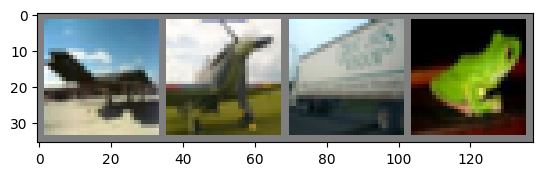

plane plane truck frog 


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
##Define a Convolutional Neural Network

In [6]:
# import torch.nn as nn
# import torch.nn.functional as F

# #Increase the number of feature maps
# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         # 1 input image channel, 6 output channels, 5x5 square convolution
#         # kernel
#         self.conv1 = nn.Conv2d(3, 6, 5)
# #         self.conv1 = nn.Conv2d(3, 8, 5)
# #         self.conv1 = nn.Conv2d(3, 10, 5)
# #         self.conv1 = nn.Conv2d(3, 12, 5)
        
#         self.pool = nn.MaxPool2d(2, 2)  #subsampling
#         self.conv2 = nn.Conv2d(6, 16, 5)
# #         self.conv2 = nn.Conv2d(6, 20, 5)
# #         self.conv2 = nn.Conv2d(6, 24, 5)
# #         self.conv2 = nn.Conv2d(6, 28, 5)
        
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x))) #CONV1 => RELU =>POOL layer
#         x = self.pool(F.relu(self.conv2(x)))
        
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc1(x)) #FC => RELU layers
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


# net = Net()

In [43]:
import torch.nn as nn
import torch.nn.functional as F

#Add more convolutional layers 9,11,13
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        self.pool = nn.MaxPool2d(2, 2)  #subsampling
        self.conv2 = nn.Conv2d(6, 16, 5)
#         self.conv3 = nn.Conv2d(16, 26, 5) #9 layers
#         self.conv4 = nn.Conv2d(16, 24, 5) #11 layers
#         self.conv5 = nn.Conv2d(24, 28, 5) #13 layers
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #CONV1 =>x RELU =>POOL layer
        x = self.pool(F.relu(self.conv2(x)))
#         x = F.relu(self.conv3(x))
#         x = self.pool(F.relu(self.conv4(x)))
#         x = self.pool(F.relu(self.conv5(x)))
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x)) #FC => RELU layers
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [44]:
# import torch.nn as nn
# import torch.nn.functional as F

# #Experiment with different nonlinear activation functions
# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         # 1 input image channel, 6 output channels, 5x5 square convolution
#         # kernel
#         self.conv1 = nn.Conv2d(3, 6, 5)        
#         self.pool = nn.MaxPool2d(2, 2)  #subsampling
#         self.conv2 = nn.Conv2d(6, 16, 5)        
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x))) #CONV1 => RELU =>POOL layer
#         x = self.pool(F.relu(self.conv2(x)))
        
# #         x = self.pool(F.Sigmoid(self.conv1(x))) #CONV1 => RELU =>POOL layer
# #         x = self.pool(F.Sigmoid(self.conv2(x)))
        
# #         x = self.pool(F.Tanh(self.conv1(x))) #CONV1 => RELU =>POOL layer
# #         x = self.pool(F.Tanh(self.conv2(x)))
        
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc1(x)) #FC => RELU layers
#         x = F.relu(self.fc2(x))
        
# #         x = F.Sigmoid(self.fc1(x)) #FC => RELU layers
# #         x = F.Sigmoid(self.fc2(x))

# #         x = F.Tanh(self.fc1(x)) #FC => RELU layers
# #         x = F.Tanh(self.fc2(x))
        
#         x = self.fc3(x)
#         return x


# net = Net()

In [45]:
##Define a Loss function and optimizer

In [46]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  #交叉熵损失
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [47]:
##Train the network

In [ ]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

In [ ]:
#quickly save our trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
#Test the network on the test data

In [ ]:
#display an image from the test set to look
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
#load back in our saved model, wasn’t necessary here
net = Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
outputs = net(images)

In [ ]:
#The outputs are energies for the 10 classes. 
#The higher the energy for a class, the more the network thinks that the image is of the particular class. 
#So, let’s get the index of the highest energy:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

In [ ]:
#Let us look at how the network performs on the whole dataset.
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

#That looks way better than chance, which is 10% accuracy (randomly picking a class out of 10 classes). Seems like the network learnt something.

In [ ]:
# what are the classes that performed well, and the classes that did not perform well:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')